# Prediction Using Unsupervised ML
### This Notebook demonstrates the implementation of Decision Tree Algorithm.
In this task we will use IRIS-DATASET to create the Decision Tree classifier and visualize it graphically.

In [32]:
#importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading and Understanding Data

In [33]:
data = pd.read_csv(r"C:\Users\Shahjeb Hasan\Downloads\Iris.csv")
data.head(50)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [34]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

As we can see there 3 different species so there should be ideally 3 clusters for this dataset.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since, there are no null or missing values present, therefore we can move further for data exploration.

### Data Visualization

<Figure size 1440x720 with 0 Axes>

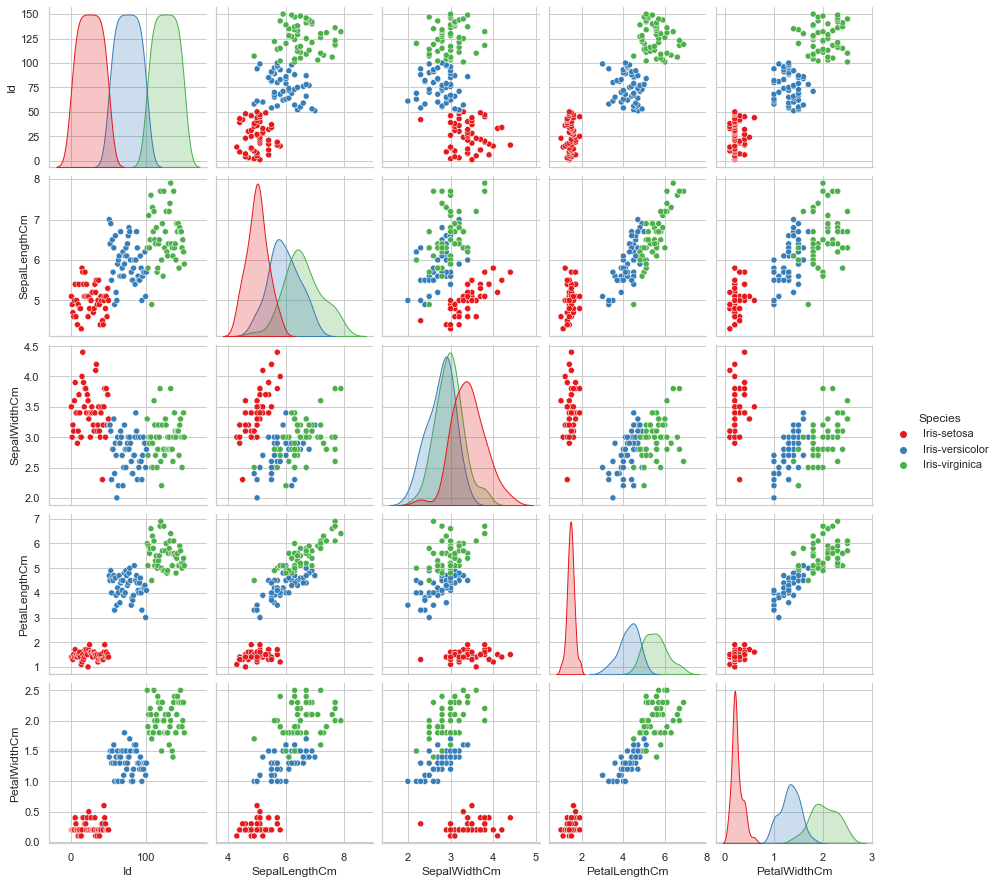

In [60]:
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.pairplot(data, hue = "Species",palette="Set1")

<AxesSubplot:>

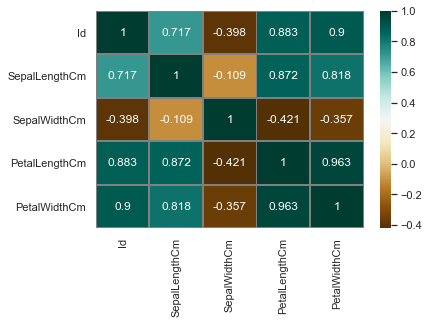

In [67]:
sns.heatmap(data.corr(), annot = True, fmt = ".3g", linewidth = 0.8, linecolor = "Gray", cmap = "BrBG")

### Data Preprocessing

In [39]:
#Segregating Features and labels to fit the model
X = data.iloc[:, :-1].values    #Features
y = data.iloc[:, -1].values     #Target

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3, shuffle = True) 

We usually split the data around 30%-70%(in our case) between testing and training stages. The train-test split is a technique for evaluating the performance of a machine learning algorithm. The objective is to estimate the performance of the machine learning model on new data: data not used to train the model. I have also put shuffle=True for better generalization.

### Model Building

In [68]:
#function to fit data using Gini
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    model_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing fitting 
    model_gini.fit(X_train, y_train) 
    return model_gini 
      
# Function to fit the data using Entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    model_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing fitting 
    model_entropy.fit(X_train, y_train) 
    return model_entropy 

Using two methods i.e; **Gini Index** and **Entropy** to fit the data and calculate accuracy.

In [74]:
# function to make prediction
def prediction(X_test, trained_model): 
   
    y_pred = trained_model.predict(X_test)
    compared_data = pd.DataFrame({'Actual value' : y_test, 'predicted value' : y_pred})
    compared_data
    print("Prediction Class on New data\n ",y_pred)
    return y_pred 


In [44]:
# fuction to calculate Accuracy
def cal_accuracy(y_test, y_pred): 
      
    print (f"\n Accuracy : {accuracy_score(y_test,y_pred)*100}")  
    print(f"\n Report : {classification_report(y_test, y_pred)}") 

In [69]:
from sklearn.tree import DecisionTreeClassifier

trained_model_gini = train_using_gini(X_train, X_test, y_train) 
trained_model_entropy = tarin_using_entropy(X_train, X_test, y_train) 

print(trained_model_gini)
print(trained_model_entropy)
    

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)


In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("***************Results using Gini****************\n")
prediction_gini = prediction(X_test, trained_model_gini)
cal_accuracy(y_test, prediction_gini) 


***************Results using Gini****************

Prediction Class on New data
  ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']

 Accuracy : 97.77777777777777

 Report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versico

In [78]:
print("***************Results using Entropy**************\n")

prediction_entropy = prediction(X_test, trained_model_entropy) 
cal_accuracy(y_test, prediction_entropy)

***************Results using Entropy**************

Prediction Class on New data
  ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']

 Accuracy : 97.77777777777777

 Report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versic

We can see that in both the cases the Accuracy on Test Data is 97.777 i.e; we have got an immensely accurate Decision Tree and our model is 97.77% Accurate.

In [79]:
compared_data = pd.DataFrame({'Actual value' : y_test, 'predicted value' : prediction_entropy})
compared_data

,Actual value,predicted value
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-versicolor
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor



 Confusion Matrix


<AxesSubplot:>

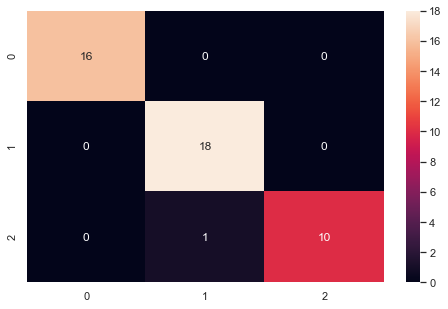

In [51]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 5))
print("\n Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, prediction_gini), annot = True)

As both the model produces same accuracy we can use any of them to find out the confusion matrix. I have also shown its distribution graphically for better understanding using seaborn.heatmap.

### Visualizing Tree

In [57]:
#Using plot_tree function from sklearn.tree module to visualize the Decision Tree
def visualize_tree(model):
    plt.figure(figsize = (8, 6))
    tree = plot_tree(model, feature_names = data.columns, class_names=data["Species"].unique(),label = "all", filled = True)
    plt.show()

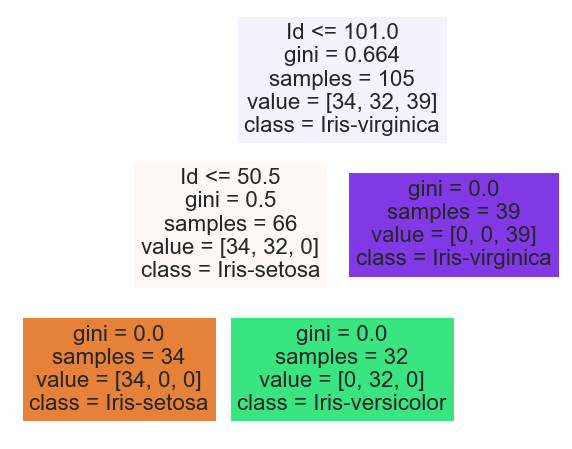

In [58]:
from sklearn.tree import plot_tree
visualize_tree(trained_model_gini)

Visualization of the decison tree using **gini_index** criterion.

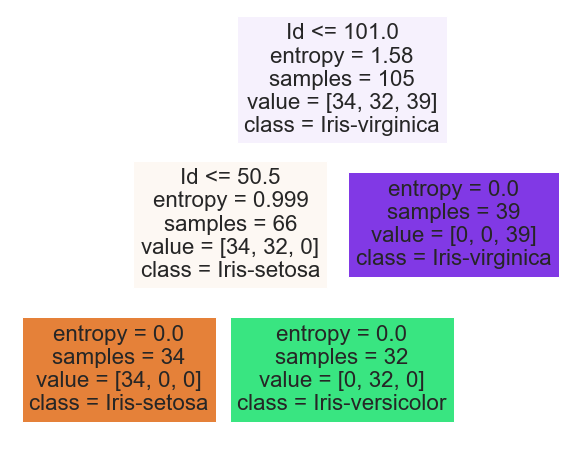

In [59]:
visualize_tree(trained_model_entropy)

Visualization of the decison tree using **entropy** criterion.